<a href="https://colab.research.google.com/github/ahmadharimukti/contohbaru/blob/main/tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import string
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [66]:
#Mount your drive account into colab

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [67]:
def load_data():
    df = pd.read_csv('drive/My Drive/Colab Notebooks/data/Twitter Spam/train.csv')
    return df

In [68]:
df = load_data()
df

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,NaN
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,NaN
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,NaN
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,NaN


In [69]:
# ------ menghapus kolom --------
df.drop(df.columns[[1,2,3,4,5,7]], axis = 1, inplace = True)

In [70]:
df

,Tweet,Type
0,Good Morning Love @LeeBrown_V,Quality
1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam
2,Haven't been following the news but I understa...,Quality
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality
...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",Spam
14895,"They don't have to like you, and you don't hav...",Quality
14896,#Miami Graham Nash Live at Parker Playhouse #...,Spam
14897,@bethannhamilton is in the business of one-upp...,Quality


In [71]:
df["Type"].value_counts()

Quality         7454
Spam            7443
South Dakota       2
Name: Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


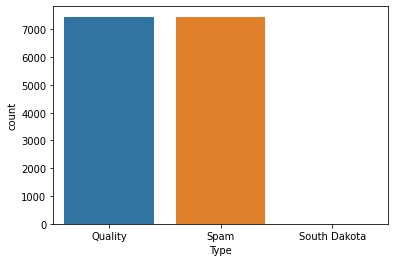

In [72]:
sns.countplot(df['Type'], label = 'Count')

In [73]:
# ------ convert label dari teks ke int --------
df.Type[df.Type=='Quality']=0
df.Type[df.Type=='Spam']=1

df.head()

,Tweet,Type
0,Good Morning Love @LeeBrown_V,0
1,'@realDonaldTrump @USNavy RIP TO HEROES',1
2,Haven't been following the news but I understa...,0
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,0


In [74]:
def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) #menghapus semua tentang '\n'
    text = re.sub('RT',' ',text) #menghapus semua simbol retweet
    text = re.sub('USER',' ',text) #menghapus semua username
    text = re.sub(' +',' ',text) #menghapus extra spaces
    text = re.sub(r'http?://\S+|www\.\S+', '', text) #menghapus url (http)
    return text

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ',text)
    text = re.sub('[^a-zA-Z0-9#@]+', ' ',text)
    return text
    
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation)) #Menghapus tanda baca
    return text

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text) #Menghapus angka


In [75]:
def preprocess(text):
    text = remove_unnecessary_char(text) #2
    text = remove_nonaplhanumeric(text)
    text = remove_number(text)
    text = remove_punctuation(text)
    return text

In [76]:
df['Tweet'] = df['Tweet'].apply(preprocess)

In [77]:
df

,Tweet,Type
0,Good Morning Love LeeBrown V,0
1,realDonaldTrump USNavy RIP TO HEROES,1
2,Haven t been following the news but I understa...,0
3,pic twitter com dyqftLhZ What to do with paper...,0
4,DidYouKnow Mahatma Gandhi made a brief visit ...,0
...,...,...
14894,AllWentWrongWhen I told my hair stylist to go...,1
14895,They don t have to like you and you don t have...,0
14896,Miami Graham Nash Live at Parker Playhouse local,1
14897,bethannhamilton is in the business of one upp...,0


In [78]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
df['Tweet'] = df['Tweet'].str.lower()


print('Case Folding Result : \n')
print(df['Tweet'].head(5))
print('\n\n\n')

Case Folding Result : 

0                         good morning love leebrown v
1                realdonaldtrump usnavy rip to heroes 
2    haven t been following the news but i understa...
3    pic twitter com dyqftlhz what to do with paper...
4     didyouknow mahatma gandhi made a brief visit ...
Name: Tweet, dtype: object






In [79]:
# ------ tokenizer --------
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

In [82]:
df['Tokenized']=tokenized(df['Tweet'])
df.head()

,Tweet,Type,Tokenized
0,good morning love leebrown v,0,"[good, morning, love, leebrown, v]"
1,realdonaldtrump usnavy rip to heroes,1,"[realdonaldtrump, usnavy, rip, to, heroes]"
2,haven t been following the news but i understa...,0,"[haven, t, been, following, the, news, but, i,..."
3,pic twitter com dyqftlhz what to do with paper...,0,"[pic, twitter, com, dyqftlhz, what, to, do, wi..."
4,didyouknow mahatma gandhi made a brief visit ...,0,"[didyouknow, mahatma, gandhi, made, a, brief, ..."


In [83]:
# ------ stopword --------
id_stopword_dict = pd.read_csv('drive/My Drive/Colab Notebooks/data/Twitter Spam/stopwords.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})
id_stopword_dict.head()

,stopword
0,a
1,a's
2,able
3,about
4,above


In [84]:
def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub(' +',' ',text) #remove extra spaces
    text = text.strip()
    return text

In [85]:
def preprocess(text):
    text = remove_stopword(text) #5
    return text

In [86]:
df['stopword'] = df['Tweet'].apply(preprocess)
df

,Tweet,Type,Tokenized,stopword
0,good morning love leebrown v,0,"[good, morning, love, leebrown, v]",good morning love leebrown
1,realdonaldtrump usnavy rip to heroes,1,"[realdonaldtrump, usnavy, rip, to, heroes]",realdonaldtrump usnavy rip heroes
2,haven t been following the news but i understa...,0,"[haven, t, been, following, the, news, but, i,...",haven news understand eff dumbest things
3,pic twitter com dyqftlhz what to do with paper...,0,"[pic, twitter, com, dyqftlhz, what, to, do, wi...",pic twitter dyqftlhz paper scissors glue paper...
4,didyouknow mahatma gandhi made a brief visit ...,0,"[didyouknow, mahatma, gandhi, made, a, brief, ...",didyouknow mahatma gandhi made visit lecture n...
...,...,...,...,...
14894,allwentwrongwhen i told my hair stylist to go...,1,"[allwentwrongwhen, i, told, my, hair, stylist,...",allwentwrongwhen told hair stylist nuts
14895,they don t have to like you and you don t have...,0,"[they, don, t, have, to, like, you, and, you, ...",don don care
14896,miami graham nash live at parker playhouse local,1,"[miami, graham, nash, live, at, parker, playho...",miami graham nash live parker playhouse local
14897,bethannhamilton is in the business of one upp...,0,"[bethannhamilton, is, in, the, business, of, o...",bethannhamilton business upping good


In [87]:
df['tweet'] = df['stopword']
df

,Tweet,Type,Tokenized,stopword,tweet
0,good morning love leebrown v,0,"[good, morning, love, leebrown, v]",good morning love leebrown,good morning love leebrown
1,realdonaldtrump usnavy rip to heroes,1,"[realdonaldtrump, usnavy, rip, to, heroes]",realdonaldtrump usnavy rip heroes,realdonaldtrump usnavy rip heroes
2,haven t been following the news but i understa...,0,"[haven, t, been, following, the, news, but, i,...",haven news understand eff dumbest things,haven news understand eff dumbest things
3,pic twitter com dyqftlhz what to do with paper...,0,"[pic, twitter, com, dyqftlhz, what, to, do, wi...",pic twitter dyqftlhz paper scissors glue paper...,pic twitter dyqftlhz paper scissors glue paper...
4,didyouknow mahatma gandhi made a brief visit ...,0,"[didyouknow, mahatma, gandhi, made, a, brief, ...",didyouknow mahatma gandhi made visit lecture n...,didyouknow mahatma gandhi made visit lecture n...
...,...,...,...,...,...
14894,allwentwrongwhen i told my hair stylist to go...,1,"[allwentwrongwhen, i, told, my, hair, stylist,...",allwentwrongwhen told hair stylist nuts,allwentwrongwhen told hair stylist nuts
14895,they don t have to like you and you don t have...,0,"[they, don, t, have, to, like, you, and, you, ...",don don care,don don care
14896,miami graham nash live at parker playhouse local,1,"[miami, graham, nash, live, at, parker, playho...",miami graham nash live parker playhouse local,miami graham nash live parker playhouse local
14897,bethannhamilton is in the business of one upp...,0,"[bethannhamilton, is, in, the, business, of, o...",bethannhamilton business upping good,bethannhamilton business upping good


In [88]:
#-----------------penghapusan kolom-------------
df.drop(df.columns[[0,2,3]], axis = 1, inplace = True)
df

,Type,tweet
0,0,good morning love leebrown
1,1,realdonaldtrump usnavy rip heroes
2,0,haven news understand eff dumbest things
3,0,pic twitter dyqftlhz paper scissors glue paper...
4,0,didyouknow mahatma gandhi made visit lecture n...
...,...,...
14894,1,allwentwrongwhen told hair stylist nuts
14895,0,don don care
14896,1,miami graham nash live parker playhouse local
14897,0,bethannhamilton business upping good


In [89]:
#--------penyimpanan hasil preprosesing---------------
df.to_csv('drive/My Drive/Colab Notebooks/data/Twitter Spam/preprocessing-hasil.csv',encoding='utf8', index=False)
df

,Type,tweet
0,0,good morning love leebrown
1,1,realdonaldtrump usnavy rip heroes
2,0,haven news understand eff dumbest things
3,0,pic twitter dyqftlhz paper scissors glue paper...
4,0,didyouknow mahatma gandhi made visit lecture n...
...,...,...
14894,1,allwentwrongwhen told hair stylist nuts
14895,0,don don care
14896,1,miami graham nash live parker playhouse local
14897,0,bethannhamilton business upping good


In [90]:
# Buat list tipe data kosong
missing_values = ["N/A", "na", "NaN"," ", "--"]
df = pd.read_csv("drive/My Drive/Colab Notebooks/data/Twitter Spam/preprocessing-hasil.csv", na_values = missing_values)
df.head(10)

,Type,tweet
0,0,good morning love leebrown
1,1,realdonaldtrump usnavy rip heroes
2,0,haven news understand eff dumbest things
3,0,pic twitter dyqftlhz paper scissors glue paper...
4,0,didyouknow mahatma gandhi made visit lecture n...
5,1,amms samantha bee attack trump insults million...
6,0,don talk tipsy
7,0,politicshttps twitter ngunjiriwambugu status
8,1,banking brexit time invest uk colin ward colin...
9,1,serving protecting wordregrets https kvlhsg


In [91]:
#penghapusan data kosong
df.dropna(inplace=True)
df.isnull().sum()

Type     0
tweet    0
dtype: int64

In [92]:
#penghapusan data duplikat
df.drop_duplicates(subset ="tweet", keep = 'first', inplace = True)

In [93]:
df.to_csv('drive/My Drive/Colab Notebooks/data/Twitter Spam/preprocessing-hasil.csv',encoding='utf8', index=False)
df

,Type,tweet
0,0,good morning love leebrown
1,1,realdonaldtrump usnavy rip heroes
2,0,haven news understand eff dumbest things
3,0,pic twitter dyqftlhz paper scissors glue paper...
4,0,didyouknow mahatma gandhi made visit lecture n...
...,...,...
14894,1,allwentwrongwhen told hair stylist nuts
14895,0,don don care
14896,1,miami graham nash live parker playhouse local
14897,0,bethannhamilton business upping good


In [94]:
#penghitungan jumlah dataset
text = df["tweet"].tolist()
print(len(text))

14531


# **Word2vec**

In [95]:
#tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
token =Tokenizer()
token.fit_on_texts(text)

In [96]:
token.index_word

{1: 'https',
 2: 'twitter',
 3: 'pic',
 4: 'trump',
 5: 'news',
 6: 'status',
 7: 'don',
 8: 'people',
 9: 'love',
 10: 'day',
 11: 'time',
 12: 'man',
 13: 'good',
 14: 'police',
 15: 'video',
 16: 'today',
 17: 'world',
 18: 'sports',
 19: 'make',
 20: 'happy',
 21: 'life',
 22: 'back',
 23: 'amp',
 24: 'obama',
 25: 'breaking',
 26: 'politics',
 27: 'year',
 28: 'black',
 29: 'great',
 30: 'white',
 31: 'hillary',
 32: 'watch',
 33: 'work',
 34: 'll',
 35: 'show',
 36: 'president',
 37: 'local',
 38: 'state',
 39: 'media',
 40: 'lol',
 41: 'america',
 42: 'school',
 43: 'home',
 44: 've',
 45: 'live',
 46: 'house',
 47: 'woman',
 48: 'win',
 49: 'stop',
 50: 'god',
 51: 'things',
 52: 'years',
 53: 'free',
 54: 'real',
 55: 'health',
 56: 'clinton',
 57: 'women',
 58: 'big',
 59: 'girl',
 60: 'music',
 61: 'vote',
 62: 'top',
 63: 'fire',
 64: 'give',
 65: 'birthday',
 66: 'killed',
 67: 'im',
 68: 'feel',
 69: 'business',
 70: 'realdonaldtrump',
 71: 'support',
 72: 'morning',
 73:

In [97]:
#penghitingan jumlah vocabulary
vocab = len(token.index_word)+1
vocab

34131

In [98]:
encode_text = token.texts_to_sequences(text)
print(encode_text)

[[13, 72, 9, 9883], [70, 6504, 1884, 1710], [391, 5, 660, 3912, 9884, 51], [3, 2, 9885, 762, 6505, 3913, 9886, 4879], [9887, 9888, 9889, 85, 433, 4880, 9890, 2414, 9891], [4881, 9892, 3236, 134, 4, 3914, 1088, 194, 1, 9893, 4882, 1, 9894], [7, 91, 9895], [9896, 2, 9897, 6], [3915, 1173, 11, 3916, 242, 1174, 3237, 9898, 1, 9899, 9900, 6506], [3238, 2140, 9901, 1, 9902], [1711, 174], [1399, 4883], [4884, 1885, 709, 876, 4, 1, 9903, 1, 9904], [6507, 135, 434], [3239, 661, 2415, 9905], [9906, 9907, 145, 9908, 4885, 9909, 9910, 6508, 9911], [230, 4886, 212, 9912, 46, 3917, 9913, 3917, 4887, 446, 9914, 6509, 2772], [6510, 9915], [2773, 154, 12, 2416, 1712, 1, 9916, 1, 9917], [9918, 30, 6511, 4888, 1886, 28, 218, 238, 1400], [1006, 19, 1401, 598, 412], [6512, 77, 35, 9919], [2417, 1556, 282, 1713, 163], [32, 6513, 9920, 2418, 1272, 9921, 2, 9922], [543, 2419, 9923, 2141, 1007, 6514, 9924, 1402, 1273, 1, 9925], [6515, 1175, 6516, 4889, 3918, 113, 34, 2420, 1089], [2421, 9926, 251, 4890, 4, 324

In [99]:
#padding data
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_kata=100
x= pad_sequences(encode_text, maxlen = max_kata, padding="post")
x

array([[   13,    72,     9, ...,     0,     0,     0],
       [   70,  6504,  1884, ...,     0,     0,     0],
       [  391,     5,   660, ...,     0,     0,     0],
       ...,
       [  293,  1547,  4972, ...,     0,     0,     0],
       [34127,    69, 34128, ...,     0,     0,     0],
       [ 6306,   543,   673, ...,     0,     0,     0]], dtype=int32)

In [100]:
from tensorflow.keras.utils import to_categorical
y = df["Type"]
y = to_categorical(y)
print(y)

ValueError: ignored

In [101]:
#pembagian data test dan training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state =0, test_size =0.20, stratify=y)

In [102]:
#jumlah data training testing
print("x_train :",len(x_train))
print("x_test :",len(x_test))

x_train : 11624
x_test : 2907


In [103]:
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
sentences = [word_tokenize(tweet.lower()) for tweet in tqdm(df.tweet)]
sentences[5]

  0%|          | 0/14531 [00:00<?, ?it/s]

['amms',
 'samantha',
 'bee',
 'attack',
 'trump',
 'insults',
 'millions',
 'americans',
 'https',
 'ycgbuqjpzy',
 'amis',
 'https',
 'ngyzojidr']

In [105]:
import gensim, os
word2vec_model = gensim.models.Word2Vec(sentences, size= 100, window=5, min_count=1, iter=10, sg=0, hs=0)
filename = 'drive/My Drive/Colab Notebooks/data/Twitter Spam/yx_word2vec.txt'
word2vec_model.wv.save_word2vec_format(filename, binary=False)

In [107]:
word2vec_embeddings_index = {}
word2vec_file = open(os.path.join('', 'drive/My Drive/Colab Notebooks/data/Twitter Spam/yx_word2vec.txt'), encoding = "utf-8")

for line in word2vec_file:
    values = line.split()
    word = values[0]
    coefficient = np.asarray(values[1:])
    word2vec_embeddings_index[word] = coefficient
word2vec_file.close()

In [108]:
embedding_dims = 100

In [109]:
embedding_matrix = np.zeros((vocab, embedding_dims))
for word, i in token.word_index.items():
    if i < vocab:
        embedding_vector = word2vec_embeddings_index.get(word)
         #words not found in embedding index will be all-zeros.
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [110]:
embedding_matrix.shape

(34131, 100)

In [111]:
embedding_matrix[1]

array([ 0.3226365 , -0.50158674, -0.5151381 , -0.6264135 , -2.4331863 ,
       -0.5139447 ,  2.0985074 ,  0.22871228, -1.0227337 , -2.5621462 ,
        0.42335388, -3.9257286 ,  3.0837445 , -1.0142022 ,  1.8298312 ,
       -0.48407885, -1.1686623 ,  1.6139414 , -0.49163252,  0.35097387,
       -1.0315993 ,  2.6525152 , -0.5527697 ,  3.1224346 ,  0.6809895 ,
        1.6513592 , -0.9236375 ,  0.63120055,  2.7221818 ,  0.9523524 ,
       -0.07520867, -0.575549  ,  0.40689233, -0.56540716,  0.21634692,
       -0.30207074, -1.5229365 ,  2.709417  , -1.7656853 ,  2.2751389 ,
        0.1896187 , -0.39106026,  0.38775626, -2.6489856 , -0.20981161,
       -0.33654577, -1.9375107 , -0.856621  , -0.3168757 ,  1.4522591 ,
        2.3543973 ,  0.6978982 ,  1.9153118 ,  0.5586163 , -0.3656544 ,
        2.1414065 ,  1.0593649 , -1.0361935 ,  0.10528291, -1.8796111 ,
       -0.3075808 , -1.9546477 ,  0.8697226 ,  1.6594296 ,  1.9982389 ,
        0.37065795, -1.8153248 , -1.04295   , -3.7823734 ,  1.16

# **Pemodelan CNN**

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Flatten
model = Sequential()
model.add(Embedding(vocab, embedding_dims, weights=[embedding_matrix], input_length=max_kata, trainable=False))
model.add(Conv1D(64,2, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3413100   
                                                                 
 conv1d (Conv1D)             (None, 99, 64)            12864     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1216)              0         
                                                                 
 dense (Dense)               (None, 2)                 2434      
                                                        

# **Uji Coba**

In [113]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [126]:
history = model.fit(x_train, y_train,epochs=20,validation_data =(x_test, y_test), shuffle=True, verbose=1)


Epoch 1/20


TypeError: ignored

In [116]:
score = model.evaluate(x_test, y_test, verbose=1)

ValueError: ignored

In [117]:
print("Test Loss:", score[0]) 
print("Test Accuracy:", score[1]) 

NameError: ignored

# **Evaluasi**

In [118]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [119]:
plot_history(history)

NameError: ignored

In [120]:

from sklearn.metrics import classification_report, confusion_matrix

In [121]:
preds = model.predict(x_test)
preds = np.apply_along_axis(np.argmax, 1, preds)
true = np.apply_along_axis(np.argmax, 1, np.asarray(y_test))
conf_m = confusion_matrix(true, preds)
print("confusion_matrix is")
print(conf_m)

print(classification_report(true, preds))

AxisError: ignored

In [122]:
import seaborn as sns
group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in conf_m.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_m.flatten()/np.sum(conf_m)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_m, annot=labels, fmt='', cmap='Blues')

NameError: ignored